<a href="https://colab.research.google.com/github/vineelnoel/cifar-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, Flatten, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
X_train.shape[0]

50000

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
X_train, X_test = X_train/255.0, X_test/255.0

In [9]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000,)

In [12]:
K = len(set(y_train))
print(K)

10


In [13]:
i = Input(shape=X_train[0].shape)

In [14]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train,  validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3083 - accuracy: 0.5480 - val_loss: 1.0959 - val_accuracy: 0.6289
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8544 - accuracy: 0.7035 - val_loss: 0.9379 - val_accuracy: 0.6838
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6939 - accuracy: 0.7600 - val_loss: 0.8017 - val_accuracy: 0.7329
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5877 - accuracy: 0.7962 - val_loss: 0.7180 - val_accuracy: 0.7565
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4969 - accuracy: 0.8308 - val_loss: 0.6986 - val_accuracy: 0.7690
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4181 - accuracy: 0.8563 - val_loss: 0.6741 - val_accuracy: 0.7917
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3559 - accuracy: 0.8780 - val_loss: 0.7953 - val_accura

In [16]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5491 - accuracy: 0.8261 - val_loss: 0.5156 - val_accuracy: 0.8379
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4333 - accuracy: 0.8565 - val_loss: 0.4852 - val_accuracy: 0.8424
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3993 - accuracy: 0.8673 - val_loss: 0.4683 - val_accuracy: 0.8468
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3839 - accuracy: 0.8725 - val_loss: 0.4928 - val_accuracy: 0.8416
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3651 - accuracy: 0.8770 - val_loss: 0.4863 - val_accuracy: 0.8495
Epoch 6/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3503 - accuracy: 0.8819 - val_loss: 0.4333 - val_accuracy: 0.8603
Epoch 7/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3318 - accuracy: 0.8883 - val_loss: 0.4485 -

Confusion Matrix without normalization
[[919   4  27   6   2   1   2   5  22  12]
 [  6 966   1   0   0   0   0   0   4  23]
 [ 32   2 838  18  38  14  38  14   4   2]
 [ 16   6  40 734  28  70  68  20   6  12]
 [  8   1  42  15 873   9  29  20   1   2]
 [  9   3  37 112  26 747  24  37   0   5]
 [  4   2  22  21   8   0 939   1   2   1]
 [  6   1  15  12  26   9   3 921   2   5]
 [ 33  10   2   0   2   1   3   1 926  22]
 [ 16  48   1   3   2   0   3   3   4 920]]


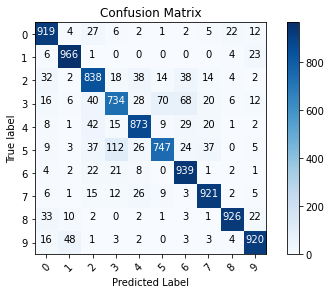

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix without normalization')

  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [18]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

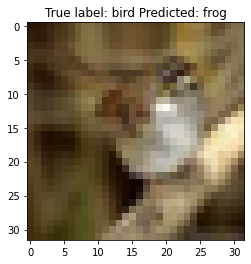

In [23]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));